In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('log.csv')
df.head()

,iteration,time,vehicles_present[0],vehicles_present[1],vehicles_present[2],vehicles_present[3],vehicles_passed,traffic_light[0]
0,0,0.0,1,0,0,0,0,3
1,0,0.0,1,0,0,0,0,3
2,0,0.0,1,0,0,0,0,3
3,0,1.0,1,0,0,0,0,3
4,0,1.0,1,0,0,0,0,3


In [20]:
df = df[df['iteration'] < 10]
df.tail()

,iteration,time,vehicles_present[0],vehicles_present[1],vehicles_present[2],vehicles_present[3],vehicles_passed,traffic_light[0]
186995,9,4674.0,2,4,1,0,82983,2
186996,9,4674.0,2,4,1,0,82984,2
186997,9,4674.0,2,4,1,0,82986,1
186998,9,4674.0,2,2,1,0,82986,1
186999,9,4675.0,2,2,1,0,82987,1


In [21]:
new = []
old_ = df[' vehicles_passed'].to_numpy().tolist()
old = old_[::-1]
for idx in range(len(old)-1):
    new.append(old[idx] - old[idx+1])
new.append(0)



In [22]:
new_ = new[::-1]
df[' vehicles_passed'] = new_
df.head()

,iteration,time,vehicles_present[0],vehicles_present[1],vehicles_present[2],vehicles_present[3],vehicles_passed,traffic_light[0]
0,0,0.0,1,0,0,0,0,3
1,0,0.0,1,0,0,0,0,3
2,0,0.0,1,0,0,0,0,3
3,0,1.0,1,0,0,0,0,3
4,0,1.0,1,0,0,0,0,3


In [64]:
df_1 = df[df['iteration'] == 9]
df_1.head(10)

,iteration,time,vehicles_present[0],vehicles_present[1],vehicles_present[2],vehicles_present[3],vehicles_passed,traffic_light[0]
168300,9,0.0,0,0,1,0,0,3
168301,9,0.0,0,0,1,0,0,3
168302,9,0.0,0,0,1,0,0,3
168303,9,1.0,0,0,1,0,0,3
168304,9,1.0,0,0,1,0,0,3
168305,9,1.0,0,0,1,0,0,2
168306,9,1.0,0,1,1,0,0,2
168307,9,2.0,0,1,1,0,0,2
168308,9,2.0,0,1,1,0,0,2
168309,9,2.0,0,1,2,0,0,2


In [65]:
unique_time = df[' time'].unique()
cols = [' vehicles_present[0]', ' vehicles_present[1]',
       ' vehicles_present[2]', ' vehicles_present[3]', ' vehicles_passed']
tmp = [[] for i in range(len(cols))]

for time in unique_time[:-2]:
    tmp_df = df_1[df_1[' time'] == time]
    for idx, col in enumerate(cols):
        tmp_col = tmp_df[col].to_numpy().sum()
        tmp[idx].append(tmp_col)



In [33]:
len(tmp[0])

4674

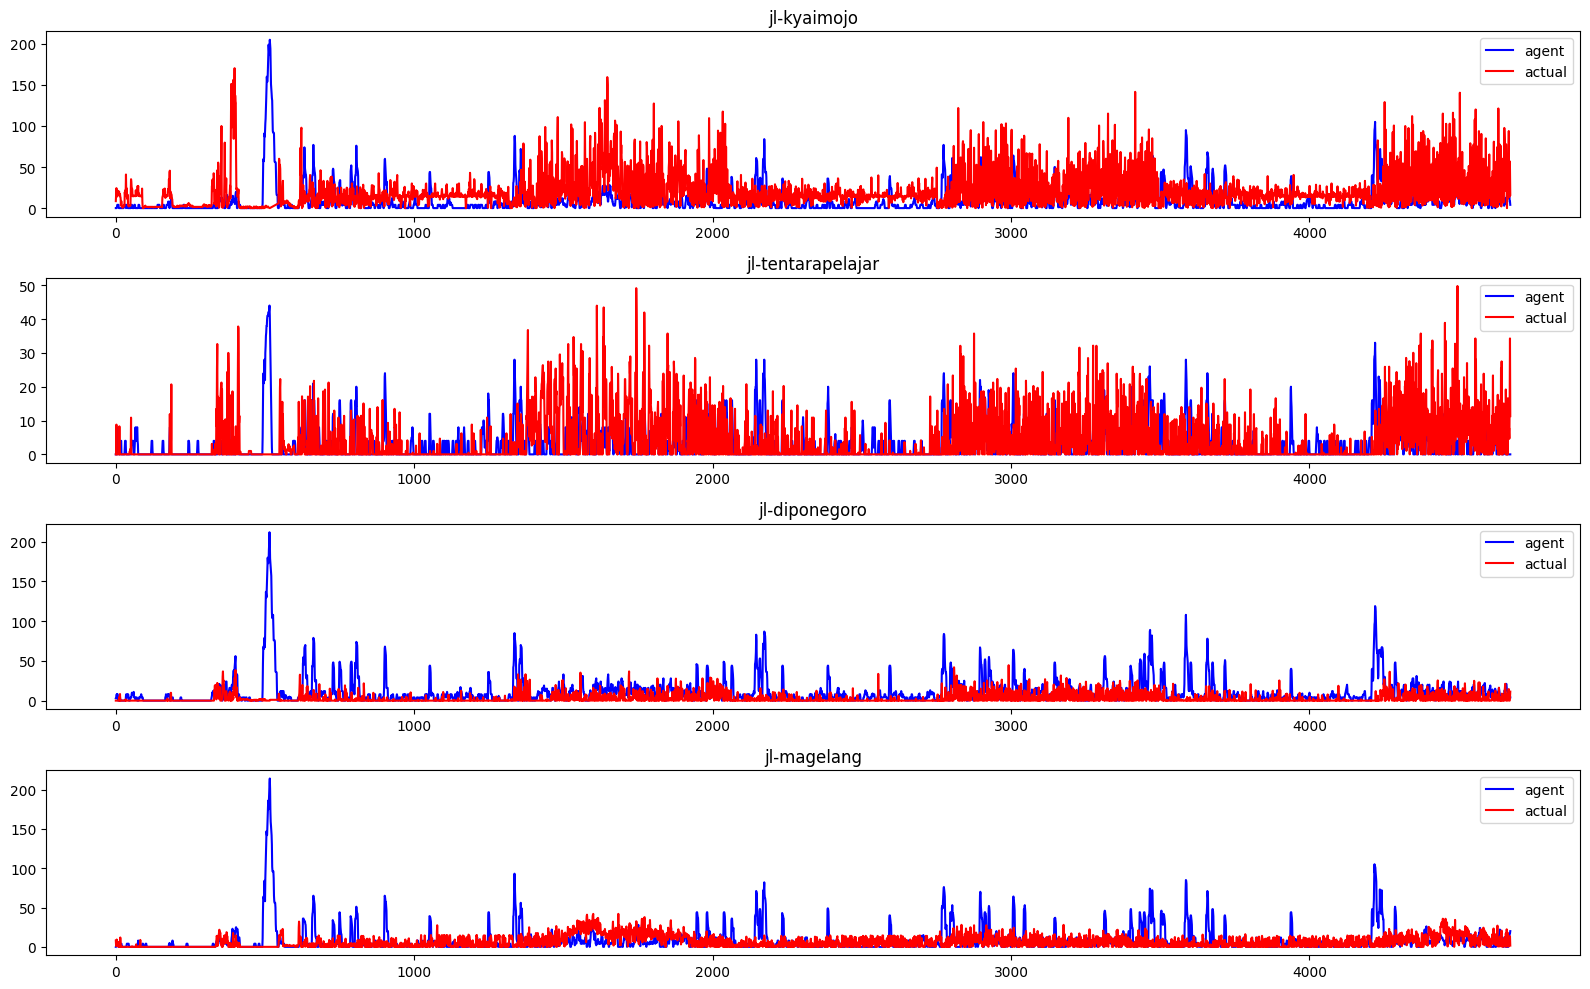

In [90]:
# x = [i for i in range(4674)]
# plt.plot(x, tmp[0])
# plt.plot(x, np.abs(df_real['jl-kyaimojo-masuk'].to_numpy()))


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 10))  # Adjust figsize as needed

# You can access each subplot using axes[row_index]
# For example, to plot on the first subplot:
axes[0].plot(tmp[0], color='blue', label='agent')
axes[0].plot(np.abs(df_real['jl-kyaimojo-masuk'].to_numpy()), color='red', label='actual')
axes[0].set_title('jl-kyaimojo')
axes[0].legend()


axes[1].plot(tmp[3], color='blue', label='agent')
axes[1].plot(np.abs(df_real['jl-tentarapelajar-masuk'].to_numpy()), color='red', label='actual')
axes[1].set_title('jl-tentarapelajar')
axes[1].legend()


axes[2].plot(tmp[2], color='blue', label='agent')
axes[2].plot(np.abs(df_real['jl-diponegoro-masuk'].to_numpy()), color='red', label='actual')
axes[2].set_title('jl-diponegoro')
axes[2].legend()


axes[3].plot(tmp[1], color='blue', label='agent')
axes[3].plot(np.abs(df_real['jl-magelang-masuk'].to_numpy()), color='red', label='actual')
axes[3].set_title('jl-magelang')
axes[3].legend()

# axes[4].plot(tmp[4])
# axes[4].plot(np.abs(df_real['persimpangan'].to_numpy()))

# Continue plotting on other subplots as needed
# Adjust layout for better spacing
# plt.suptitle('iteration - 9')
plt.tight_layout()

# Show the plots
plt.show()

In [99]:
a = tmp[0]
b = np.abs(df_real['jl-kyaimojo-masuk'].to_numpy()) 
c = (a-b)
print(c.sum()/b.shape[0])

-11.39184870294303


In [95]:
a = tmp[3]
b = np.abs(df_real['jl-tentarapelajar-masuk'].to_numpy()) 
c = (a-b)
print(c.sum()/b.shape[0])

-0.9415342117758988


In [96]:
a = tmp[2]
b = np.abs(df_real['jl-diponegoro-masuk'].to_numpy()) 
c = (a-b)
print(c.sum()/b.shape[0])

8.68064942890356


In [97]:
a = tmp[1]
b = np.abs(df_real['jl-magelang-masuk'].to_numpy()) 
c = (a-b)
print(c.sum()/b.shape[0])

2.570414808792078


In [28]:
df[' time'].to_numpy()

array([   0.,    0.,    0., ..., 4674., 4674., 4675.])

In [24]:
df.columns

Index(['iteration', ' time', ' vehicles_present[0]', ' vehicles_present[1]',
       ' vehicles_present[2]', ' vehicles_present[3]', ' vehicles_passed',
       ' traffic_light[0]'],
      dtype='object')

In [8]:
df_real = pd.read_csv('clean_data.csv')
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4674 entries, 0 to 4673
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   jl-magelang-masuk         4674 non-null   float64
 1   jl-magelang-keluar        4674 non-null   float64
 2   jl-kyaimojo-masuk         4674 non-null   float64
 3   jl-diponegoro-masuk       4674 non-null   float64
 4   jl-diponegoro-keluar      4674 non-null   float64
 5   jl-tentarapelajar-masuk   4674 non-null   float64
 6   jl-tentarapelajar-keluar  4674 non-null   float64
 7   jl-kyaimojo-keluar        4674 non-null   float64
 8   persimpangan              4674 non-null   float64
 9   time                      4674 non-null   object 
dtypes: float64(9), object(1)
memory usage: 365.3+ KB
